# IST 5520 Competition Problem (HW 11)
## By: Sayantan Majumdar and Dawit Wolday Asfaw
### Contributions: 

#### Sayantan- Model implementation, Hyperparameter Tuning; Dawit- Data transformation, Model comparison

## 1. Data Exploration

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('Data/train_data.csv')
test_df = pd.read_csv('Data/test_data.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.099854,0.285808,0.0,0.000,0.000,0.00000,4.340
word_freq_address,3220.0,0.219792,1.329902,0.0,0.000,0.000,0.00000,14.280
word_freq_all,3220.0,0.284391,0.504691,0.0,0.000,0.000,0.43000,4.540
word_freq_3d,3220.0,0.041627,1.010729,0.0,0.000,0.000,0.00000,40.130
word_freq_our,3220.0,0.306783,0.654040,0.0,0.000,0.000,0.37000,10.000
word_freq_over,3220.0,0.100839,0.289473,0.0,0.000,0.000,0.00000,5.880
word_freq_remove,3220.0,0.112981,0.402128,0.0,0.000,0.000,0.00000,7.270
word_freq_internet,3220.0,0.108127,0.414894,0.0,0.000,0.000,0.00000,11.110
word_freq_order,3220.0,0.087357,0.255191,0.0,0.000,0.000,0.00000,2.590
word_freq_mail,3220.0,0.239550,0.661345,0.0,0.000,0.000,0.15000,18.180


In [7]:
train_df['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [8]:
pd.crosstab(index=train_df['class'], columns="Percent") * 100 / pd.crosstab(index=train_df['class'], columns="Percent").sum()

col_0,Percent
class,
0,60.590062
1,39.409938


We see that there is a class imbalance issue

## 2. Minority Class Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [10]:
random_state = 0

In [11]:
y = train_df['class'].copy()
X = train_df.drop(columns='class')

In [12]:
ros = RandomOverSampler(random_state=random_state)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [13]:
y_unique, counts = np.unique(y_resampled, return_counts=True)
counts = counts.astype(np.float64)
counts *= 100 / y_resampled.size
y_unique, counts

(array([0, 1], dtype=int64), array([50., 50.]))

We see that there are 50% positive class (1) and 50% negative class (0) compared to the earlier ~40% and ~60%, respectively.

## 3. Dimensionality Reduction
### 3.1 Correlation Analysis

In [14]:
full_df = X_resampled.copy()
full_df['class'] = y_resampled

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

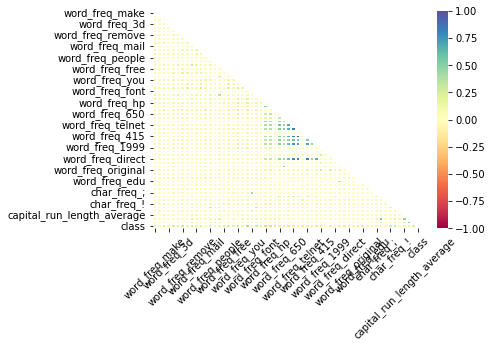

In [16]:
# Correlation heatmap
corr = full_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Spectral', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)

plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.show()

In [17]:
corr[~((np.round(corr['class'], 1) >= 0.1) | (np.round(corr['class'], 1) <= -0.1))]['class'] 

word_freq_address   -0.042142
word_freq_3d         0.040828
word_freq_will       0.015313
word_freq_parts     -0.037109
Name: class, dtype: float64

From the correlation analysis, we observe that there is neglible correlation between the predictors themselves (which is good). However, we find that the above four features have very little correlation with 'class'. So, we could drop these predictors.

### 3.2 Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

#### 3.2.1 Training Data Normalization

In [19]:
robust_scaler = RobustScaler()
norm_arr = robust_scaler.fit_transform(X_resampled)
norm_df = pd.DataFrame(norm_arr)

#### 3.2.2 Full-component PCA Solution

In [20]:
pca_linear = PCA(n_components=X_resampled.shape[1])
pca_linear.fit(norm_arr)

PCA(n_components=57)

In [21]:
var_pca = np.cumsum(np.round(pca_linear.explained_variance_ratio_, decimals=4) * 100)
print(var_pca)

[44.56 65.3  82.28 88.14 90.57 92.49 94.16 95.18 95.87 96.51 97.03 97.41
 97.71 97.97 98.19 98.4  98.58 98.75 98.88 99.   99.11 99.19 99.26 99.33
 99.39 99.45 99.5  99.55 99.59 99.63 99.66 99.69 99.72 99.75 99.77 99.79
 99.81 99.83 99.85 99.87 99.88 99.89 99.9  99.91 99.92 99.93 99.94 99.95
 99.96 99.97 99.98 99.99 99.99 99.99 99.99 99.99 99.99]


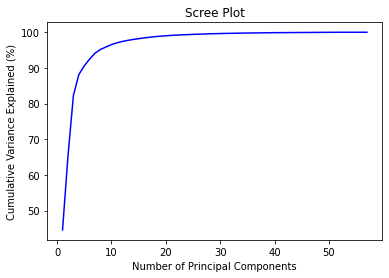

In [22]:
# Scree plot
var_pca = pd.DataFrame(var_pca, index=np.arange(1, 58))
plt.plot(var_pca, color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.show()

In [23]:
X_resampled.shape

(3902, 57)

We observe that just 10 components can explain 96.51% of the variance in the original (resampled) data. So we can reduce the data dimensionality from (3902, 57) to (3902, 10).

#### 3.2.3 10-component PCA Solution for the training data

In [24]:
train_pca_linear = PCA(n_components=10)
train_pca_transform_arr = train_pca_linear.fit_transform(norm_arr)
train_pca_transform_df = pd.DataFrame(train_pca_transform_arr)
train_pca_transform_df.columns = ['PC' + str(n) for n in range(1, 11)]
train_pca_transform_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.453512,-1.695300,-4.478301,2.680070,-1.250226,-0.405044,-1.473970,-0.603313,0.560734,0.960324
1,-1.536066,-1.574751,-4.737534,-0.971238,-1.159408,-0.080636,-1.517539,-0.589622,-0.267278,0.343098
2,-1.710360,-1.602568,-4.753899,-0.764065,-1.062538,2.227127,0.960755,-0.940977,0.236159,0.025891
3,-1.946335,5.004364,-2.247153,-0.500346,6.955392,-0.940309,-1.126106,0.034145,-0.329408,-0.543647
4,-1.666459,-1.470204,-4.844010,-1.109913,-1.551977,-0.450811,-1.451392,-1.412238,-0.315621,-1.311881


#### 3.2.4 Test Data Normalization and PCA transformation

In [25]:
y_test = test_df['class'].copy()
X_test = test_df.drop(columns='class')

In [26]:
robust_scaler = RobustScaler()
test_norm_arr = robust_scaler.fit_transform(X_test)

In [27]:
test_pca_linear = PCA(n_components=10)
test_pca_transform_arr = test_pca_linear.fit_transform(test_norm_arr)
test_pca_transform_df = pd.DataFrame(test_pca_transform_arr)
test_pca_transform_df.columns = ['PC' + str(n) for n in range(1, 11)]
test_pca_transform_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.328872,-1.950373,-2.036754,-2.449795,-4.686220,5.308072,-1.163911,0.973234,0.148588,-0.885092
1,-1.737351,1.742728,-2.029109,-0.623460,3.829281,1.893643,3.278832,0.636953,0.192429,-1.053690
2,-0.010020,5.801110,-1.663521,1.260431,-0.111421,-0.946312,0.352971,0.316364,-0.130672,-0.404998
3,-2.052768,-2.140386,-2.073400,-1.965361,-1.141785,-1.029858,0.778948,-0.340614,0.020148,-0.452853
4,-1.189987,-2.403963,-2.091722,-2.515825,-3.027219,1.995327,0.718748,-0.454290,-1.162903,8.307509


## 4. Modeling
### 4.1 Hyperparameter Tuning using GridSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [29]:
param_dict = {
    'n_estimators': [300, 400, 500, 600, 700],
    'max_features': [5, 6, 7, 8, 9, 10],
    'max_depth': [6, 10, 20, None],
    'max_samples': [None, 0.9, 0.8, 0.7],
    'min_samples_leaf': [1, 1e-2, 1e-3]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=random_state)
model = RandomForestClassifier(n_jobs=-1, random_state=random_state)
model_grid = GridSearchCV(estimator=model, param_grid=param_dict, 
                          scoring=['roc_auc', 'balanced_accuracy', 'f1', 'precision', 'recall'], 
                          n_jobs=-1, cv=cv, refit='roc_auc', return_train_score=True)

In [ ]:
search = model_grid.fit(train_pca_transform_df, y_resampled)

### 4.2 Error Metrics for Train, Validation, and Test data

In [ ]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score

def calc_error_metrics(gs_obj):
    """
    Calculate train, validation, and test error metrics
    :param gs_obj: Fitted GridSearchCV object
    :return Pandas dataframe containing the error metrics
    """
    
    roc_auc_list = []
    ba_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    search_data = ['mean_train', 'mean_test']
    scores = gs_obj.cv_results_
    for sd in search_data:
        roc_auc = scores['{}_roc_auc'.format(sd)].mean()
        ba = scores['{}_balanced_accuracy'.format(sd)].mean()
        f1 = scores['{}_f1'.format(sd)].mean()
        precision = scores['{}_precision'.format(sd)].mean()
        recall = scores['{}_recall'.format(sd)].mean()
        roc_auc_list.append(roc_auc)
        ba_list.append(ba)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)
    best_model = gs_obj.best_estimator_
    y_pred = best_model.predict(test_pca_transform_df)
    roc_auc_list.append(roc_auc_score(y_test, y_pred))
    ba_list.append(balanced_accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    results_dict = {
        'Data': ['Train', 'Validation', 'Test'],
        'ROC_AUC': roc_auc_list,
        'Balanced_Accuracy': ba_list,
        'F1 Score': f1_list,
        'Precision': precision_list,
        'Recall': recall_list
    }
    results_df = pd.DataFrame(data=results_dict)
    return results_df
    

In [ ]:
print(calc_error_metrics(search))